## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  69.715872  1140.763956  0.886737   2.464041  1.675394
1  29.204018   126.332985  0.027329   1.061343  0.231755
2   9.624814   795.257556  0.486553   5.449847  1.691204
3   8.214502   784.775583  0.251664   5.973556  1.414834
4  44.568911   629.892745  0.916943  10.585260  1.523895


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0228447	total: 65.9ms	remaining: 1m 5s
1:	learn: 1.0161720	total: 66.3ms	remaining: 33.1s
2:	learn: 1.0053358	total: 66.8ms	remaining: 22.2s
3:	learn: 0.9953822	total: 67.2ms	remaining: 16.7s
4:	learn: 0.9851997	total: 67.6ms	remaining: 13.5s
5:	learn: 0.9777950	total: 68.2ms	remaining: 11.3s
6:	learn: 0.9706033	total: 68.6ms	remaining: 9.73s
7:	learn: 0.9611261	total: 69.1ms	remaining: 8.57s
8:	learn: 0.9536497	total: 69.5ms	remaining: 7.66s
9:	learn: 0.9433727	total: 70.1ms	remaining: 6.94s
10:	learn: 0.9347478	total: 70.6ms	remaining: 6.35s
11:	learn: 0.9269654	total: 71.2ms	remaining: 5.86s
12:	learn: 0.9178116	total: 71.7ms	remaining: 5.44s
13:	learn: 0.9102046	total: 72.1ms	remaining: 5.08s
14:	learn: 0.9006807	total: 72.5ms	remaining: 4.76s
15:	learn: 0.8918936	total: 73ms	remaining: 4.49s
16:	learn: 0.8821231	total: 73.5ms	remaining: 4.25s
17:	learn: 0.8768546	total: 73.9ms	remaining: 4.03s
18:	learn: 0.8687772	total: 74.5ms	remaining: 

86:	learn: 0.5035304	total: 106ms	remaining: 1.11s
87:	learn: 0.5005628	total: 106ms	remaining: 1.1s
88:	learn: 0.4968311	total: 107ms	remaining: 1.09s
89:	learn: 0.4938195	total: 107ms	remaining: 1.09s
90:	learn: 0.4914683	total: 108ms	remaining: 1.08s
91:	learn: 0.4877945	total: 108ms	remaining: 1.07s
92:	learn: 0.4844582	total: 109ms	remaining: 1.06s
93:	learn: 0.4815674	total: 109ms	remaining: 1.05s
94:	learn: 0.4781509	total: 110ms	remaining: 1.04s
95:	learn: 0.4751953	total: 110ms	remaining: 1.04s
96:	learn: 0.4722362	total: 111ms	remaining: 1.03s
97:	learn: 0.4696584	total: 111ms	remaining: 1.02s
98:	learn: 0.4668814	total: 111ms	remaining: 1.01s
99:	learn: 0.4635140	total: 112ms	remaining: 1.01s
100:	learn: 0.4599008	total: 112ms	remaining: 999ms
101:	learn: 0.4575154	total: 113ms	remaining: 992ms
102:	learn: 0.4542266	total: 113ms	remaining: 985ms
103:	learn: 0.4510805	total: 114ms	remaining: 978ms
104:	learn: 0.4482009	total: 114ms	remaining: 971ms
105:	learn: 0.4448668	total

261:	learn: 0.2012898	total: 188ms	remaining: 528ms
262:	learn: 0.2005139	total: 188ms	remaining: 527ms
263:	learn: 0.1996051	total: 189ms	remaining: 526ms
264:	learn: 0.1983095	total: 189ms	remaining: 524ms
265:	learn: 0.1975320	total: 190ms	remaining: 523ms
266:	learn: 0.1968012	total: 190ms	remaining: 522ms
267:	learn: 0.1961628	total: 190ms	remaining: 520ms
268:	learn: 0.1954380	total: 191ms	remaining: 519ms
269:	learn: 0.1946868	total: 191ms	remaining: 517ms
270:	learn: 0.1937622	total: 192ms	remaining: 516ms
271:	learn: 0.1934086	total: 192ms	remaining: 515ms
272:	learn: 0.1930350	total: 193ms	remaining: 513ms
273:	learn: 0.1924084	total: 193ms	remaining: 512ms
274:	learn: 0.1917816	total: 194ms	remaining: 511ms
275:	learn: 0.1911674	total: 194ms	remaining: 510ms
276:	learn: 0.1905542	total: 195ms	remaining: 508ms
277:	learn: 0.1898367	total: 195ms	remaining: 507ms
278:	learn: 0.1892535	total: 196ms	remaining: 506ms
279:	learn: 0.1888122	total: 196ms	remaining: 504ms
280:	learn: 

480:	learn: 0.1080900	total: 288ms	remaining: 311ms
481:	learn: 0.1079806	total: 289ms	remaining: 311ms
482:	learn: 0.1078685	total: 289ms	remaining: 310ms
483:	learn: 0.1077608	total: 290ms	remaining: 309ms
484:	learn: 0.1076678	total: 290ms	remaining: 308ms
485:	learn: 0.1074103	total: 291ms	remaining: 308ms
486:	learn: 0.1073194	total: 291ms	remaining: 307ms
487:	learn: 0.1072136	total: 292ms	remaining: 306ms
488:	learn: 0.1067506	total: 292ms	remaining: 306ms
489:	learn: 0.1063296	total: 293ms	remaining: 305ms
490:	learn: 0.1060662	total: 293ms	remaining: 304ms
491:	learn: 0.1056768	total: 294ms	remaining: 303ms
492:	learn: 0.1052941	total: 294ms	remaining: 302ms
493:	learn: 0.1051883	total: 294ms	remaining: 302ms
494:	learn: 0.1048144	total: 295ms	remaining: 301ms
495:	learn: 0.1047097	total: 295ms	remaining: 300ms
496:	learn: 0.1043076	total: 296ms	remaining: 299ms
497:	learn: 0.1039388	total: 296ms	remaining: 299ms
498:	learn: 0.1038349	total: 297ms	remaining: 298ms
499:	learn: 

652:	learn: 0.0637995	total: 370ms	remaining: 196ms
653:	learn: 0.0636241	total: 370ms	remaining: 196ms
654:	learn: 0.0634671	total: 371ms	remaining: 195ms
655:	learn: 0.0633999	total: 371ms	remaining: 195ms
656:	learn: 0.0633335	total: 371ms	remaining: 194ms
657:	learn: 0.0632680	total: 372ms	remaining: 193ms
658:	learn: 0.0631149	total: 372ms	remaining: 193ms
659:	learn: 0.0629300	total: 373ms	remaining: 192ms
660:	learn: 0.0628654	total: 373ms	remaining: 191ms
661:	learn: 0.0628016	total: 373ms	remaining: 191ms
662:	learn: 0.0626518	total: 374ms	remaining: 190ms
663:	learn: 0.0625296	total: 374ms	remaining: 189ms
664:	learn: 0.0623628	total: 375ms	remaining: 189ms
665:	learn: 0.0622163	total: 375ms	remaining: 188ms
666:	learn: 0.0619977	total: 376ms	remaining: 188ms
667:	learn: 0.0617573	total: 376ms	remaining: 187ms
668:	learn: 0.0615227	total: 377ms	remaining: 186ms
669:	learn: 0.0613783	total: 377ms	remaining: 186ms
670:	learn: 0.0611650	total: 377ms	remaining: 185ms
671:	learn: 

876:	learn: 0.0357620	total: 471ms	remaining: 66.1ms
877:	learn: 0.0355779	total: 472ms	remaining: 65.5ms
878:	learn: 0.0355021	total: 472ms	remaining: 65ms
879:	learn: 0.0354281	total: 472ms	remaining: 64.4ms
880:	learn: 0.0353261	total: 473ms	remaining: 63.9ms
881:	learn: 0.0352259	total: 473ms	remaining: 63.3ms
882:	learn: 0.0351273	total: 474ms	remaining: 62.8ms
883:	learn: 0.0350209	total: 474ms	remaining: 62.2ms
884:	learn: 0.0349238	total: 475ms	remaining: 61.7ms
885:	learn: 0.0348282	total: 475ms	remaining: 61.2ms
886:	learn: 0.0347342	total: 476ms	remaining: 60.6ms
887:	learn: 0.0346269	total: 476ms	remaining: 60.1ms
888:	learn: 0.0345343	total: 477ms	remaining: 59.5ms
889:	learn: 0.0343593	total: 477ms	remaining: 59ms
890:	learn: 0.0342565	total: 478ms	remaining: 58.4ms
891:	learn: 0.0341618	total: 478ms	remaining: 57.9ms
892:	learn: 0.0340721	total: 479ms	remaining: 57.3ms
893:	learn: 0.0339801	total: 479ms	remaining: 56.8ms
894:	learn: 0.0338761	total: 479ms	remaining: 56.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

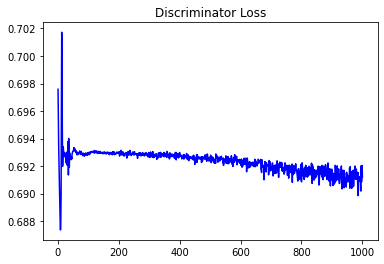

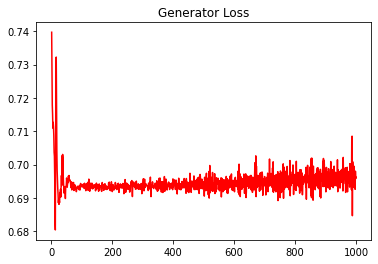

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.23711466883448726


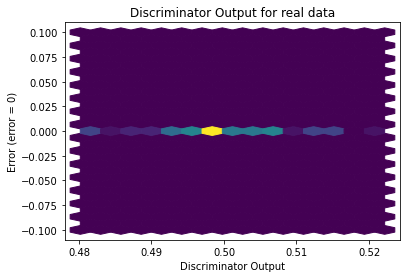

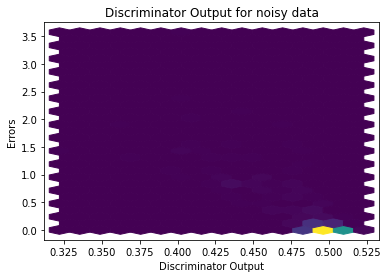

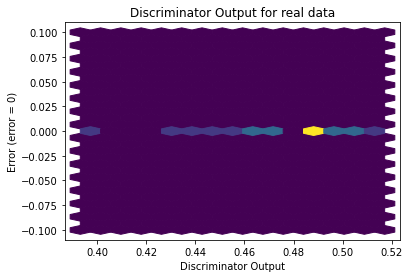

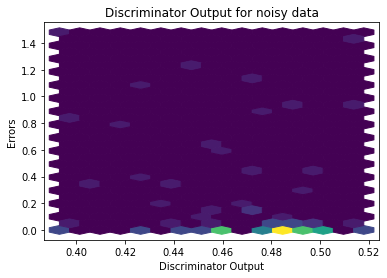

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


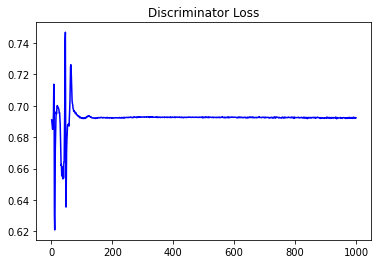

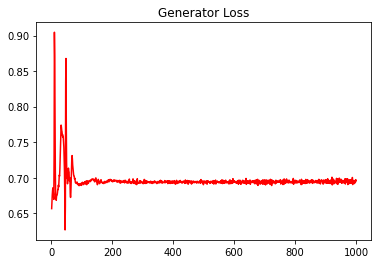

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17642369935309352


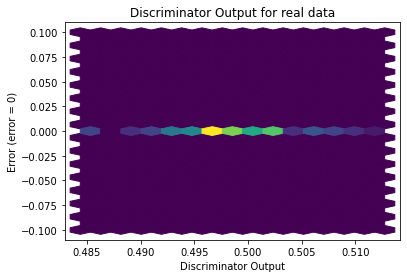

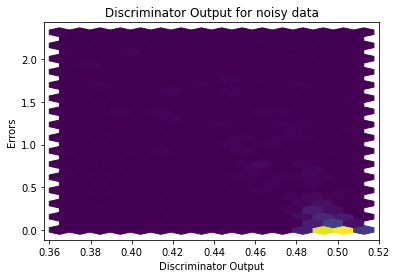

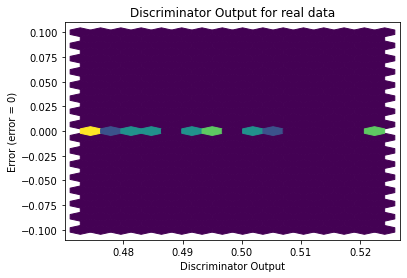

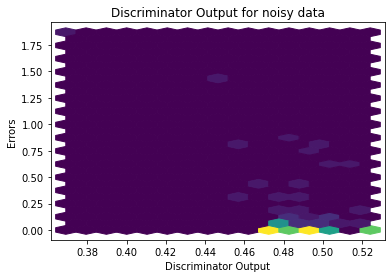

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7320]], requires_grad=True)
